In [ ]:
# https://www.techwithtim.net/tutorials/

In [ ]:
# linear regression
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

! wget http://techwithtim.net/wp-content/uploads/2019/01/student-mat.csv

In [ ]:
data = pd.read_csv("student-mat.csv", sep=";")
print(len(data))
print(type(data))
print(data.shape)
print(data.head())
print()
all_cols = []
for col in data:
  all_cols.append(col)
print(all_cols)

data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

data = shuffle(data) # Optional - shuffle the data

print(len(data))
print(type(data))
print(data.shape)
print(data.head())
print()

predict = "G3"
X = np.array(data.drop([predict], 1))
print(len(X))
print(type(X))
print(X.shape)
print(X[:5])

y = np.array(data[predict])
print(len(y))
print(type(y))
print(y.shape)
print(y[:5])
print()


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

In [ ]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
import pickle

best = 0
for _ in range(20):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)
  linear = linear_model.LinearRegression()
  linear.fit(x_train, y_train)
  acc = linear.score(x_test, y_test)
  print("Accuracy: " + str(acc))
  if acc > best:
    best = acc
    with open("studentgrades.pickle", "wb") as f:
      pickle.dump(linear, f)

# LOAD MODEL
print(best)
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

In [ ]:
predictions = linear.predict(x_test)

x_axis = []
y1_axis = []
y2_axis = []

for x in range(len(predictions)):
  #print(x_test[x], predictions[x], y_test[x], y_test[x] - predictions[x])
  #print(x_test[x], y_test[x] - predictions[x])
  x_axis.append(x)
  y1_axis.append(predictions[x])
  if y_test[x] > predictions[x]:
    y2_axis.append(y_test[x] - predictions[x])
  else:
    y2_axis.append(predictions[x] - y_test[x])
print()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
#plt.scatter(data["G3"], data[plot])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()



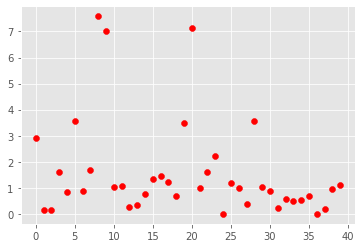

In [ ]:
flag = 0
if flag == 1:
  plt.scatter(x_axis, predictions, c='blue')
  plt.scatter(x_axis, y_test, c='red')
  plt.legend(['blue', 'red'])
else:
  plt.scatter(x_axis, y2_axis, c='red')
plt.show()


In [ ]:
# KNN
!wget http://techwithtim.net/wp-content/uploads/2019/01/Car-Data-Set.zip

import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing

!unzip Car-Data-Set.zip

In [ ]:
data = pd.read_csv("car.data")
print(data.head())
print()

print(type(data))
print(data.shape)
print()

for col in data:
  print(col)

In [ ]:
print(data.head())

le = preprocessing.LabelEncoder()

buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))

print(type(buying))
print(len(buying))
print(type(maint))
print(len(maint))
print(type(door))
print(len(door))
print(type(persons))
print(len(persons))
print(type(lug_boot))
print(len(lug_boot))
print(type(safety))
print(len(safety))
print(type(cls))
print(len(cls))

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc
<class 'numpy.ndarray'>
1728
<class 'numpy.ndarray'>
1728
<class 'numpy.ndarray'>
1728
<class 'numpy.ndarray'>
1728
<class 'numpy.ndarray'>
1728
<class 'numpy.ndarray'>
1728
<class 'numpy.ndarray'>
1728


In [ ]:
X = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(cls)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(x_train[:5])
print(x_test[:5])
print(y_train[:5])
print(y_test[:5])

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)
predicted = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]
for x in range(len(predicted)):
  print("Data: ", x_test[x], "Predicted: ", names[predicted[x]], "Actual: ", names[y_test[x]])
  #dis, ind = model.kneighbors([x_test[x]], 9, True)
  #print("N: ", ind)


In [ ]:
# SVM
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

cancer = datasets.load_breast_cancer()
print(type(cancer))
print(len(cancer))
for col in cancer:
  print(col)
print()

fns = cancer.feature_names
print(type(fns))
print(len(fns))
print(fns)
print()

tns = cancer.target_names
print(type(tns))
print(len(tns))
print(tns)
print()

In [ ]:
x = cancer.data
y = cancer.target
print(type(x))
print(len(x))
print(x.shape)
print(type(y))
print(len(y))
print(y.shape)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [ ]:
clf = svm.SVC(kernel="linear")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.9649122807017544


In [ ]:
# K-Means

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = digits.data
print(type(data))
print(data.shape)
#print(data[0])
print(data.mean(axis=0))
print(data.mean(axis=1))
print()


data = scale(digits.data)
print(type(data))
print(data.shape)
#print(data[0])
print(data.mean(axis=0))
print(data.mean(axis=1))
print()


In [ ]:
n_samples, n_features = data.shape
print(n_samples)
print(n_features)

n_digits = len(np.unique(digits.target))
print(n_digits)
print(np.unique(digits.target))

labels = digits.target
print(len(labels))
print(labels[:20])

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

sample_size = 300

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
  t0 = time()
  estimator.fit(data)
  print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
    % (name, (time() - t0), estimator.inertia_,
    metrics.homogeneity_score(labels, estimator.labels_),
    metrics.completeness_score(labels, estimator.labels_),
    metrics.v_measure_score(labels, estimator.labels_),
    metrics.adjusted_rand_score(labels, estimator.labels_),
    metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
    metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10), name="k-means++", data=data)
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10), name="random", data=data)

print(82 * '_')
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
print(data.shape)
print(reduced_data.shape)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(x_min, x_max)
print(y_min, y_max)
print(len(np.arange(x_min, x_max, h)))
print(len(np.arange(y_min, y_max, h)))
print(len(xx))
print(len(xx[0]))
print(xx.shape)
print(len(yy))
print(len(yy[0]))
print(yy.shape)

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
print(len(Z))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics

digits = load_digits()
data = scale(digits.data)
y = digits.target

k = 10
samples, features = data.shape

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
clf = KMeans(n_clusters=k, init="random", n_init=10)
bench_k_means(clf, "1", data)

clf = KMeans(n_clusters=k, init="k-means++", n_init=10)
bench_k_means(clf, "1", data)

reduced_data = PCA(n_components=2).fit_transform(data)
#kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
#kmeans.fit(reduced_data)
clf = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
bench_k_means(clf, "1", reduced_data)

clf = KMeans(init='random', n_clusters=n_digits, n_init=10)
bench_k_means(clf, "1", reduced_data)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
1        	0.20s	69656	0.669	0.712	0.690	0.550	0.687	0.136
1        	0.43s	69462	0.609	0.657	0.632	0.477	0.628	0.134
1        	0.17s	2815	0.459	0.470	0.464	0.326	0.459	0.376
1        	0.16s	2816	0.457	0.469	0.463	0.324	0.457	0.385


In [ ]:
#coding:utf-8
import numpy as np
# 坐标向量
a = np.array([1,2,3])
# 坐标向量
b = np.array([7,8])
# 从坐标向量中返回坐标矩阵
# 返回list,有两个元素,第一个元素是X轴的取值,第二个元素是Y轴的取值
xx, yy = np.meshgrid(a,b)
#返回结果: [array([ [1,2,3] [1,2,3] ]), array([ [7,7,7] [8,8,8] ])]
print(xx)
print(yy)